# Figures and reasonings useful for the report

Results here should be:
* Well motivated and explained
* Labeled
* Reproducible (preferably, do not save results at all)

In [39]:
%load_ext autoreload
%autoreload 2

import json
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Readout

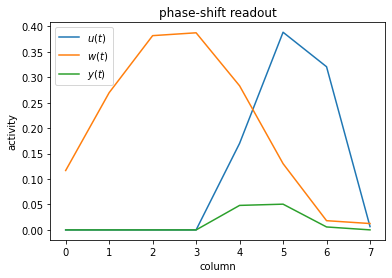

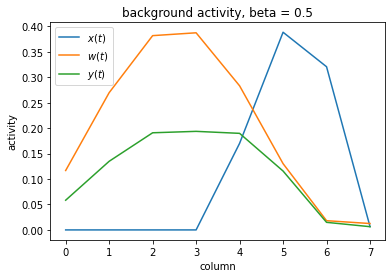

In [38]:
col = np.linspace(0, 2*np.pi, 8, endpoint=False)

head = 0.5*np.cos(col - 1)+0.5
home = 0.2*np.cos(col - 2)+0.2

u = np.maximum(0, 0.4 - head)
w = home
y = w * u

plt.figure()
plt.title("phase-shift readout")
plt.plot(u, label="$u(t)$")
plt.plot(w, label="$w(t)$")
plt.plot(y, label="$y(t)$")
plt.ylabel("activity")
plt.xlabel("column")
plt.legend()
plt.show()

x = np.maximum(0, 0.4 - head)
beta = 0.5
u = x + beta
w = home
y = w * u

plt.figure()
plt.title("background activity, beta = 0.5")
plt.plot(x, label="$x(t)$")
plt.plot(w, label="$w(t)$")
plt.plot(y, label="$y(t)$")
plt.ylabel("activity")
plt.xlabel("column")
plt.legend()
plt.show()

## Non-linear integration

Using memory cells of the dynamic $c' = \phi u (1-T)$ where $T = c$ or $T = 10^{-(c_\text{tot} - c)}$, we want to check how much of the range we can utilize (by varying $\phi$) before the system becomes too non-linear.

It seems that the assumption that we require linearity might be wrong.

This assumption was based on the intuition that a displacement at a large distance from home should have the same effect on the phase as an equivalent displacement (the same angular distance) closer to home, which seems like it would require the additivity property.

---

In the following cell, memory with the dynamics above was tested with a logarithmic range of $\phi$ between $10^{-5}$ and $10^{-2}$.

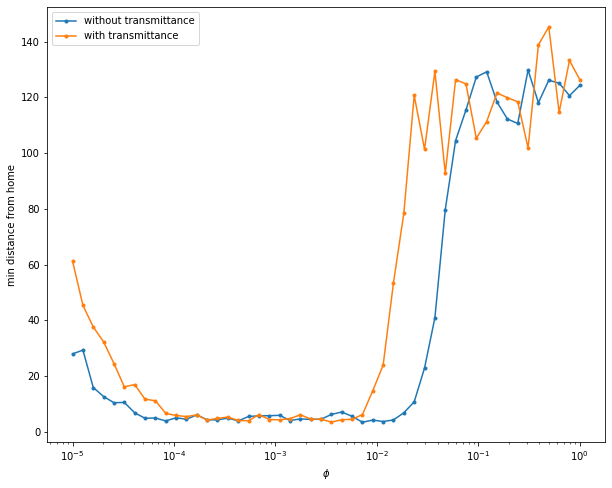

In [9]:
def plot(path, title, ax):
    data = json.load(open(path, "r"))
    points = [(config["parameters"]["cx"]["params"]["phi"], config["mean_distance"]) for config in data.values()]
    points.sort(key=lambda x: x[0])
    phi = [x[0] for x in points]
    performance = [x[1] for x in points]
    ax.plot(phi, performance, '.-', label=title)
    
plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.set_xscale("log")
plot("../../results/distances/20220814-223558.json", "without transmittance", ax)
plot("../../results/distances/20220814-223808.json", "with transmittance", ax)
plt.xlabel("$\phi$")
plt.ylabel("min distance from home")
plt.legend()
plt.show()

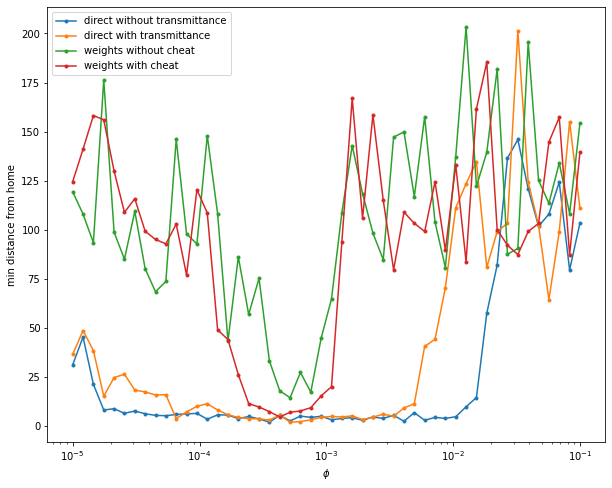

In [48]:
def plot(path, title, ax):
    data = json.load(open(path, "r"))
    points = [(config["parameters"]["cx"]["params"]["phi"], config["mean_distance"]) for config in data.values()]
    points.sort(key=lambda x: x[0])
    phi = [x[0] for x in points]
    performance = [x[1] for x in points]
    ax.plot(phi, performance, '.-', label=title)

plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.set_xscale("log")
plot("../../results/distances/20220816-112421.json", "direct without transmittance", ax)
plot("../../results/distances/20220816-115934.json", "direct with transmittance", ax)
plot("../../results/distances/20220816-112232.json", "weights without cheat", ax)
plot("../../results/distances/20220816-112113.json", "weights with cheat", ax)
plt.xlabel("$\phi$")
plt.ylabel("min distance from home")
plt.legend()
plt.show()

## Is the memory always correct or only in a certain window?

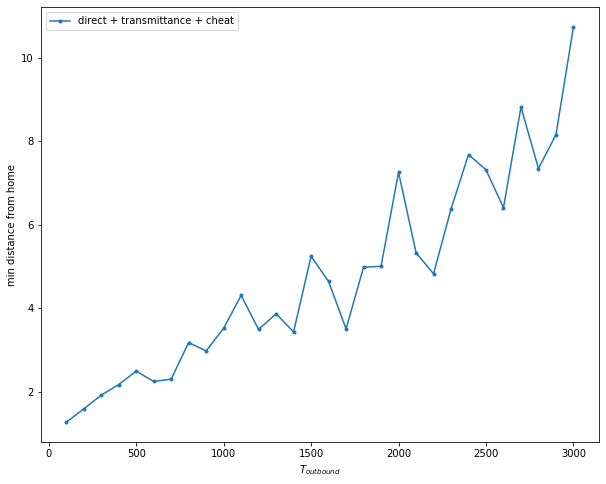

In [50]:
def plot(path, title, ax):
    data = json.load(open(path, "r"))
    points = [(config["parameters"]["T_outbound"], config["mean_distance"]) for config in data.values()]
    points.sort(key=lambda x: x[0])
    T_outbound = [x[0] for x in points]
    performance = [x[1] for x in points]
    ax.plot(T_outbound, performance, '.-', label=title)
    
plt.figure(figsize=(10, 8))
ax = plt.axes()
#ax.set_xscale("log")
plot("../../results/distances/20220816-114811.json", "direct + transmittance + cheat", ax)
plt.xlabel("$T_{outbound}$")
plt.ylabel("min distance from home")
plt.legend()
plt.show()